### <p style="text-align: right;"> &#9989; Put your name here</p>

# Day 15 Pre-class Assignment: The Pandas Data Analysis Library

<img src="https://pandas.pydata.org/_static/pandas_logo.png">

## Goals for today's pre-class assignment

* Use the Pandas module to explore and visualize data

## Assignment instructions

**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into the appropriate "Pre-class assignments" submission folder.  If you run into issues with your code, make sure to use Slack to help each other out and receive some assistance from the instructors. Submission instructions can be found at the end of the notebook.

### Useful references

For this pre-class assignment and the assignments that follow during the next week of the course, these two references might prove to be particularly useful:

* The [Pandas website](http://pandas.pydata.org/)
* [10-minute Panda Tutorial](http://pandas.pydata.org/pandas-docs/stable/10min.html)


---
# Part 1: Working with data in Pandas

*Pandas* is an extremely useful Python library for reading and analyzing datasets in a variety of formats with a variety of data types. Managing complicated files with only the Python tools we've learned up to this point is often very difficult and at times, may seem impossible. Lucky for you, someone else decided to make your life easier and created Pandas!

**Watch the following video** to learn a bit about how you can load and analyze data using this handy library! Pay particular attention to the part of the video that talks about "slicing" the data.

**Note**: This video is from a different version of this course and the order of the topics covered was slightly different so there may be references to "future" content that you already have experience with. Also, the version of Python used in this video is a bit older than the version that you have, so the format of the Pandas dataframe might look a bit different in your notebook when you display it in your notebook.

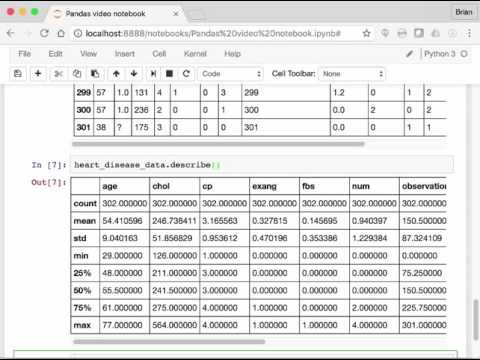

In [1]:
# Video on the Pandas module  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

from IPython.display import YouTubeVideo  
YouTubeVideo("A0InxIMAvlU",width=640,height=360)

## Practice Indexing Pandas Dataframes

The code below creates a dataframe from scratch. Review the code and, when necessary, use the internet to learn what the following Pandas methods/attributes are used for (e.g. .index and .columns) and **comment on what each line of code is doing below.**

In [2]:
Example_DataFrame = pd.DataFrame([['A',0,1,2,3],['B',4,5,6,7],['C',8,9,10,11],['D',12,13,14,15]]) # create pandas structures

Example_DataFrame.index = Example_DataFrame[0] # index is the first column

Example_DataFrame = Example_DataFrame.iloc[:,1:] # select column 1-4

Example_DataFrame.index.name = None # This line is removing the column header for the index column

Example_DataFrame.columns = ['Col_1', 'Col_2', 'Col_3','Col_4'] # give name of each column

Example_DataFrame

Col_1  Col_2  Col_3  Col_4
A      0      1      2      3
B      4      5      6      7
C      8      9     10     11
D     12     13     14     15

Now that we've created this Pandas dataframe, the following image should serve as a reference for how one can access information within it.

<img src="https://i.imgur.com/LLkcFET.png" width=500px>

## .iloc and .loc examples
Review the following lines of code for some examples of how to index Pandas dataframes and different ways of accomplishing the same task using `.iloc` and `.loc`


In [ ]:
Example_DataFrame

In [3]:
#Index Col_2 by name
print(Example_DataFrame['Col_2'])

#Index Col_2 by .iloc
print(Example_DataFrame.iloc[:,1])

A     1
B     5
C     9
D    13
Name: Col_2, dtype: int64
A     1
B     5
C     9
D    13
Name: Col_2, dtype: int64


In [4]:
#Index Row B with loc
print(Example_DataFrame.loc['B'])

#Index Row B with .iloc
print(Example_DataFrame.iloc[1])

Col_1    4
Col_2    5
Col_3    6
Col_4    7
Name: B, dtype: int64
Col_1    4
Col_2    5
Col_3    6
Col_4    7
Name: B, dtype: int64


In [5]:
#Index Value 0 with .iloc
print(Example_DataFrame.iloc[0,0])

#Index Value 0 with .loc
print(Example_DataFrame['Col_1'].loc['A'])

0
0


## Let's practice different ways to index using both .iloc and .loc. 

Examine the Example_Dataframe and complete the questions below.

1. Index [4,5,6,7] out of the example DF using .loc and .iloc 

1. Index [6,10,14] out of the example DF using .iloc

1. Index the value 10 out of the DF using .loc and .iloc

1. Print out the column names and index names

In [ ]:
# Put your answers to points 1-4 here.

#1 


#2

#3

#4


### Understanding the Pandas Dataframes default

By default, when you load a dataset with Pandas or create a dataframe from scratch, Pandas will define the row indices to just be numbers rather than unique labels that match your data. 

Review the following code that constructs a dataframe with out providing index names. Indexing will be similiar to before but now the row names are just integers representing row numbers.

In [7]:
DF_NoIndex = pd.DataFrame([[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15]]) #Comment here
DF_NoIndex.columns = ['Col_1', 'Col_2', 'Col_3','Col_4'] #

DF_NoIndex

Col_1  Col_2  Col_3  Col_4
0      0      1      2      3
1      4      5      6      7
2      8      9     10     11
3     12     13     14     15

In [8]:
#Index the third row by .loc
print(DF_NoIndex.loc[2])

#Index the third row by .iloc
print(DF_NoIndex.iloc[2])

Col_1     8
Col_2     9
Col_3    10
Col_4    11
Name: 2, dtype: int64
Col_1     8
Col_2     9
Col_3    10
Col_4    11
Name: 2, dtype: int64


In [ ]:
#Index the first and second row by loc
print(DF_NoIndex.loc[0:1])

#Index the first and second row by .iloc
print(DF_NoIndex.iloc[0:2,:])


---

# Part 2: Pandas and Plotting 

Now that we understand a bit of the fundamentals for Pandas dataframes, we're going to use a small database of data taken from patients that were admitted to the hospital with chest pains.  In the dataset, there are several columns. Here are what a few of them correspond to:

* **age** is patient age
* **chol** is serum cholesterol in units of mg/dl
* **trestbps** is the resting blood pressure of the patient upon admission
* **thalach** is the maximum heart rate achieved

The cell immediately below this loads up Pandas and reads in the data, and you should **run that cell before you do anything else and make sure you understand what it's doing!**

In [9]:
# import our standard modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# import the pandas module
import pandas

# read in some data on heart disease (don't worry too much about what "json" is!)
# from http://www.datasets.co/dataset/Heart-Disease
heart_disease_data = pandas.read_json("""[{"observation_number":0,"age":67,"sex":1,"cp":4,"trestbps":160,"chol":286,"fbs":0,"restecg":2,"thalach":108,"exang":1,"oldpeak":1.5,"slope":2,"ca":"3.0","thal":"3.0","num":2},{"observation_number":1,"age":67,"sex":1,"cp":4,"trestbps":120,"chol":229,"fbs":0,"restecg":2,"thalach":129,"exang":1,"oldpeak":2.6,"slope":2,"ca":"2.0","thal":"7.0","num":1},{"observation_number":2,"age":37,"sex":1,"cp":3,"trestbps":130,"chol":250,"fbs":0,"restecg":0,"thalach":187,"exang":0,"oldpeak":3.5,"slope":3,"ca":"0.0","thal":"3.0","num":0},{"observation_number":3,"age":41,"sex":0,"cp":2,"trestbps":130,"chol":204,"fbs":0,"restecg":2,"thalach":172,"exang":0,"oldpeak":1.4,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":4,"age":56,"sex":1,"cp":2,"trestbps":120,"chol":236,"fbs":0,"restecg":0,"thalach":178,"exang":0,"oldpeak":0.8,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":5,"age":62,"sex":0,"cp":4,"trestbps":140,"chol":268,"fbs":0,"restecg":2,"thalach":160,"exang":0,"oldpeak":3.6,"slope":3,"ca":"2.0","thal":"3.0","num":3},{"observation_number":6,"age":57,"sex":0,"cp":4,"trestbps":120,"chol":354,"fbs":0,"restecg":0,"thalach":163,"exang":1,"oldpeak":0.6,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":7,"age":63,"sex":1,"cp":4,"trestbps":130,"chol":254,"fbs":0,"restecg":2,"thalach":147,"exang":0,"oldpeak":1.4,"slope":2,"ca":"1.0","thal":"7.0","num":2},{"observation_number":8,"age":53,"sex":1,"cp":4,"trestbps":140,"chol":203,"fbs":1,"restecg":2,"thalach":155,"exang":1,"oldpeak":3.1,"slope":3,"ca":"0.0","thal":"7.0","num":1},{"observation_number":9,"age":57,"sex":1,"cp":4,"trestbps":140,"chol":192,"fbs":0,"restecg":0,"thalach":148,"exang":0,"oldpeak":0.4,"slope":2,"ca":"0.0","thal":"6.0","num":0},{"observation_number":10,"age":56,"sex":0,"cp":2,"trestbps":140,"chol":294,"fbs":0,"restecg":2,"thalach":153,"exang":0,"oldpeak":1.3,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":11,"age":56,"sex":1,"cp":3,"trestbps":130,"chol":256,"fbs":1,"restecg":2,"thalach":142,"exang":1,"oldpeak":0.6,"slope":2,"ca":"1.0","thal":"6.0","num":2},{"observation_number":12,"age":44,"sex":1,"cp":2,"trestbps":120,"chol":263,"fbs":0,"restecg":0,"thalach":173,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"7.0","num":0},{"observation_number":13,"age":52,"sex":1,"cp":3,"trestbps":172,"chol":199,"fbs":1,"restecg":0,"thalach":162,"exang":0,"oldpeak":0.5,"slope":1,"ca":"0.0","thal":"7.0","num":0},{"observation_number":14,"age":57,"sex":1,"cp":3,"trestbps":150,"chol":168,"fbs":0,"restecg":0,"thalach":174,"exang":0,"oldpeak":1.6,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":15,"age":48,"sex":1,"cp":2,"trestbps":110,"chol":229,"fbs":0,"restecg":0,"thalach":168,"exang":0,"oldpeak":1,"slope":3,"ca":"0.0","thal":"7.0","num":1},{"observation_number":16,"age":54,"sex":1,"cp":4,"trestbps":140,"chol":239,"fbs":0,"restecg":0,"thalach":160,"exang":0,"oldpeak":1.2,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":17,"age":48,"sex":0,"cp":3,"trestbps":130,"chol":275,"fbs":0,"restecg":0,"thalach":139,"exang":0,"oldpeak":0.2,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":18,"age":49,"sex":1,"cp":2,"trestbps":130,"chol":266,"fbs":0,"restecg":0,"thalach":171,"exang":0,"oldpeak":0.6,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":19,"age":64,"sex":1,"cp":1,"trestbps":110,"chol":211,"fbs":0,"restecg":2,"thalach":144,"exang":1,"oldpeak":1.8,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":20,"age":58,"sex":0,"cp":1,"trestbps":150,"chol":283,"fbs":1,"restecg":2,"thalach":162,"exang":0,"oldpeak":1,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":21,"age":58,"sex":1,"cp":2,"trestbps":120,"chol":284,"fbs":0,"restecg":2,"thalach":160,"exang":0,"oldpeak":1.8,"slope":2,"ca":"0.0","thal":"3.0","num":1},{"observation_number":22,"age":58,"sex":1,"cp":3,"trestbps":132,"chol":224,"fbs":0,"restecg":2,"thalach":173,"exang":0,"oldpeak":3.2,"slope":1,"ca":"2.0","thal":"7.0","num":3},{"observation_number":23,"age":60,"sex":1,"cp":4,"trestbps":130,"chol":206,"fbs":0,"restecg":2,"thalach":132,"exang":1,"oldpeak":2.4,"slope":2,"ca":"2.0","thal":"7.0","num":4},{"observation_number":24,"age":50,"sex":0,"cp":3,"trestbps":120,"chol":219,"fbs":0,"restecg":0,"thalach":158,"exang":0,"oldpeak":1.6,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":25,"age":58,"sex":0,"cp":3,"trestbps":120,"chol":340,"fbs":0,"restecg":0,"thalach":172,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":26,"age":66,"sex":0,"cp":1,"trestbps":150,"chol":226,"fbs":0,"restecg":0,"thalach":114,"exang":0,"oldpeak":2.6,"slope":3,"ca":"0.0","thal":"3.0","num":0},{"observation_number":27,"age":43,"sex":1,"cp":4,"trestbps":150,"chol":247,"fbs":0,"restecg":0,"thalach":171,"exang":0,"oldpeak":1.5,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":28,"age":40,"sex":1,"cp":4,"trestbps":110,"chol":167,"fbs":0,"restecg":2,"thalach":114,"exang":1,"oldpeak":2,"slope":2,"ca":"0.0","thal":"7.0","num":3},{"observation_number":29,"age":69,"sex":0,"cp":1,"trestbps":140,"chol":239,"fbs":0,"restecg":0,"thalach":151,"exang":0,"oldpeak":1.8,"slope":1,"ca":"2.0","thal":"3.0","num":0},{"observation_number":30,"age":60,"sex":1,"cp":4,"trestbps":117,"chol":230,"fbs":1,"restecg":0,"thalach":160,"exang":1,"oldpeak":1.4,"slope":1,"ca":"2.0","thal":"7.0","num":2},{"observation_number":31,"age":64,"sex":1,"cp":3,"trestbps":140,"chol":335,"fbs":0,"restecg":0,"thalach":158,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":1},{"observation_number":32,"age":59,"sex":1,"cp":4,"trestbps":135,"chol":234,"fbs":0,"restecg":0,"thalach":161,"exang":0,"oldpeak":0.5,"slope":2,"ca":"0.0","thal":"7.0","num":0},{"observation_number":33,"age":44,"sex":1,"cp":3,"trestbps":130,"chol":233,"fbs":0,"restecg":0,"thalach":179,"exang":1,"oldpeak":0.4,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":34,"age":42,"sex":1,"cp":4,"trestbps":140,"chol":226,"fbs":0,"restecg":0,"thalach":178,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":35,"age":43,"sex":1,"cp":4,"trestbps":120,"chol":177,"fbs":0,"restecg":2,"thalach":120,"exang":1,"oldpeak":2.5,"slope":2,"ca":"0.0","thal":"7.0","num":3},{"observation_number":36,"age":57,"sex":1,"cp":4,"trestbps":150,"chol":276,"fbs":0,"restecg":2,"thalach":112,"exang":1,"oldpeak":0.6,"slope":2,"ca":"1.0","thal":"6.0","num":1},{"observation_number":37,"age":55,"sex":1,"cp":4,"trestbps":132,"chol":353,"fbs":0,"restecg":0,"thalach":132,"exang":1,"oldpeak":1.2,"slope":2,"ca":"1.0","thal":"7.0","num":3},{"observation_number":38,"age":61,"sex":1,"cp":3,"trestbps":150,"chol":243,"fbs":1,"restecg":0,"thalach":137,"exang":1,"oldpeak":1,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":39,"age":65,"sex":0,"cp":4,"trestbps":150,"chol":225,"fbs":0,"restecg":2,"thalach":114,"exang":0,"oldpeak":1,"slope":2,"ca":"3.0","thal":"7.0","num":4},{"observation_number":40,"age":40,"sex":1,"cp":1,"trestbps":140,"chol":199,"fbs":0,"restecg":0,"thalach":178,"exang":1,"oldpeak":1.4,"slope":1,"ca":"0.0","thal":"7.0","num":0},{"observation_number":41,"age":71,"sex":0,"cp":2,"trestbps":160,"chol":302,"fbs":0,"restecg":0,"thalach":162,"exang":0,"oldpeak":0.4,"slope":1,"ca":"2.0","thal":"3.0","num":0},{"observation_number":42,"age":59,"sex":1,"cp":3,"trestbps":150,"chol":212,"fbs":1,"restecg":0,"thalach":157,"exang":0,"oldpeak":1.6,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":43,"age":61,"sex":0,"cp":4,"trestbps":130,"chol":330,"fbs":0,"restecg":2,"thalach":169,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":1},{"observation_number":44,"age":58,"sex":1,"cp":3,"trestbps":112,"chol":230,"fbs":0,"restecg":2,"thalach":165,"exang":0,"oldpeak":2.5,"slope":2,"ca":"1.0","thal":"7.0","num":4},{"observation_number":45,"age":51,"sex":1,"cp":3,"trestbps":110,"chol":175,"fbs":0,"restecg":0,"thalach":123,"exang":0,"oldpeak":0.6,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":46,"age":50,"sex":1,"cp":4,"trestbps":150,"chol":243,"fbs":0,"restecg":2,"thalach":128,"exang":0,"oldpeak":2.6,"slope":2,"ca":"0.0","thal":"7.0","num":4},{"observation_number":47,"age":65,"sex":0,"cp":3,"trestbps":140,"chol":417,"fbs":1,"restecg":2,"thalach":157,"exang":0,"oldpeak":0.8,"slope":1,"ca":"1.0","thal":"3.0","num":0},{"observation_number":48,"age":53,"sex":1,"cp":3,"trestbps":130,"chol":197,"fbs":1,"restecg":2,"thalach":152,"exang":0,"oldpeak":1.2,"slope":3,"ca":"0.0","thal":"3.0","num":0},{"observation_number":49,"age":41,"sex":0,"cp":2,"trestbps":105,"chol":198,"fbs":0,"restecg":0,"thalach":168,"exang":0,"oldpeak":0,"slope":1,"ca":"1.0","thal":"3.0","num":0},{"observation_number":50,"age":65,"sex":1,"cp":4,"trestbps":120,"chol":177,"fbs":0,"restecg":0,"thalach":140,"exang":0,"oldpeak":0.4,"slope":1,"ca":"0.0","thal":"7.0","num":0},{"observation_number":51,"age":44,"sex":1,"cp":4,"trestbps":112,"chol":290,"fbs":0,"restecg":2,"thalach":153,"exang":0,"oldpeak":0,"slope":1,"ca":"1.0","thal":"3.0","num":2},{"observation_number":52,"age":44,"sex":1,"cp":2,"trestbps":130,"chol":219,"fbs":0,"restecg":2,"thalach":188,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":53,"age":60,"sex":1,"cp":4,"trestbps":130,"chol":253,"fbs":0,"restecg":0,"thalach":144,"exang":1,"oldpeak":1.4,"slope":1,"ca":"1.0","thal":"7.0","num":1},{"observation_number":54,"age":54,"sex":1,"cp":4,"trestbps":124,"chol":266,"fbs":0,"restecg":2,"thalach":109,"exang":1,"oldpeak":2.2,"slope":2,"ca":"1.0","thal":"7.0","num":1},{"observation_number":55,"age":50,"sex":1,"cp":3,"trestbps":140,"chol":233,"fbs":0,"restecg":0,"thalach":163,"exang":0,"oldpeak":0.6,"slope":2,"ca":"1.0","thal":"7.0","num":1},{"observation_number":56,"age":41,"sex":1,"cp":4,"trestbps":110,"chol":172,"fbs":0,"restecg":2,"thalach":158,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"7.0","num":1},{"observation_number":57,"age":54,"sex":1,"cp":3,"trestbps":125,"chol":273,"fbs":0,"restecg":2,"thalach":152,"exang":0,"oldpeak":0.5,"slope":3,"ca":"1.0","thal":"3.0","num":0},{"observation_number":58,"age":51,"sex":1,"cp":1,"trestbps":125,"chol":213,"fbs":0,"restecg":2,"thalach":125,"exang":1,"oldpeak":1.4,"slope":1,"ca":"1.0","thal":"3.0","num":0},{"observation_number":59,"age":51,"sex":0,"cp":4,"trestbps":130,"chol":305,"fbs":0,"restecg":0,"thalach":142,"exang":1,"oldpeak":1.2,"slope":2,"ca":"0.0","thal":"7.0","num":2},{"observation_number":60,"age":46,"sex":0,"cp":3,"trestbps":142,"chol":177,"fbs":0,"restecg":2,"thalach":160,"exang":1,"oldpeak":1.4,"slope":3,"ca":"0.0","thal":"3.0","num":0},{"observation_number":61,"age":58,"sex":1,"cp":4,"trestbps":128,"chol":216,"fbs":0,"restecg":2,"thalach":131,"exang":1,"oldpeak":2.2,"slope":2,"ca":"3.0","thal":"7.0","num":1},{"observation_number":62,"age":54,"sex":0,"cp":3,"trestbps":135,"chol":304,"fbs":1,"restecg":0,"thalach":170,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":63,"age":54,"sex":1,"cp":4,"trestbps":120,"chol":188,"fbs":0,"restecg":0,"thalach":113,"exang":0,"oldpeak":1.4,"slope":2,"ca":"1.0","thal":"7.0","num":2},{"observation_number":64,"age":60,"sex":1,"cp":4,"trestbps":145,"chol":282,"fbs":0,"restecg":2,"thalach":142,"exang":1,"oldpeak":2.8,"slope":2,"ca":"2.0","thal":"7.0","num":2},{"observation_number":65,"age":60,"sex":1,"cp":3,"trestbps":140,"chol":185,"fbs":0,"restecg":2,"thalach":155,"exang":0,"oldpeak":3,"slope":2,"ca":"0.0","thal":"3.0","num":1},{"observation_number":66,"age":54,"sex":1,"cp":3,"trestbps":150,"chol":232,"fbs":0,"restecg":2,"thalach":165,"exang":0,"oldpeak":1.6,"slope":1,"ca":"0.0","thal":"7.0","num":0},{"observation_number":67,"age":59,"sex":1,"cp":4,"trestbps":170,"chol":326,"fbs":0,"restecg":2,"thalach":140,"exang":1,"oldpeak":3.4,"slope":3,"ca":"0.0","thal":"7.0","num":2},{"observation_number":68,"age":46,"sex":1,"cp":3,"trestbps":150,"chol":231,"fbs":0,"restecg":0,"thalach":147,"exang":0,"oldpeak":3.6,"slope":2,"ca":"0.0","thal":"3.0","num":1},{"observation_number":69,"age":65,"sex":0,"cp":3,"trestbps":155,"chol":269,"fbs":0,"restecg":0,"thalach":148,"exang":0,"oldpeak":0.8,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":70,"age":67,"sex":1,"cp":4,"trestbps":125,"chol":254,"fbs":1,"restecg":0,"thalach":163,"exang":0,"oldpeak":0.2,"slope":2,"ca":"2.0","thal":"7.0","num":3},{"observation_number":71,"age":62,"sex":1,"cp":4,"trestbps":120,"chol":267,"fbs":0,"restecg":0,"thalach":99,"exang":1,"oldpeak":1.8,"slope":2,"ca":"2.0","thal":"7.0","num":1},{"observation_number":72,"age":65,"sex":1,"cp":4,"trestbps":110,"chol":248,"fbs":0,"restecg":2,"thalach":158,"exang":0,"oldpeak":0.6,"slope":1,"ca":"2.0","thal":"6.0","num":1},{"observation_number":73,"age":44,"sex":1,"cp":4,"trestbps":110,"chol":197,"fbs":0,"restecg":2,"thalach":177,"exang":0,"oldpeak":0,"slope":1,"ca":"1.0","thal":"3.0","num":1},{"observation_number":74,"age":65,"sex":0,"cp":3,"trestbps":160,"chol":360,"fbs":0,"restecg":2,"thalach":151,"exang":0,"oldpeak":0.8,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":75,"age":60,"sex":1,"cp":4,"trestbps":125,"chol":258,"fbs":0,"restecg":2,"thalach":141,"exang":1,"oldpeak":2.8,"slope":2,"ca":"1.0","thal":"7.0","num":1},{"observation_number":76,"age":51,"sex":0,"cp":3,"trestbps":140,"chol":308,"fbs":0,"restecg":2,"thalach":142,"exang":0,"oldpeak":1.5,"slope":1,"ca":"1.0","thal":"3.0","num":0},{"observation_number":77,"age":48,"sex":1,"cp":2,"trestbps":130,"chol":245,"fbs":0,"restecg":2,"thalach":180,"exang":0,"oldpeak":0.2,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":78,"age":58,"sex":1,"cp":4,"trestbps":150,"chol":270,"fbs":0,"restecg":2,"thalach":111,"exang":1,"oldpeak":0.8,"slope":1,"ca":"0.0","thal":"7.0","num":3},{"observation_number":79,"age":45,"sex":1,"cp":4,"trestbps":104,"chol":208,"fbs":0,"restecg":2,"thalach":148,"exang":1,"oldpeak":3,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":80,"age":53,"sex":0,"cp":4,"trestbps":130,"chol":264,"fbs":0,"restecg":2,"thalach":143,"exang":0,"oldpeak":0.4,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":81,"age":39,"sex":1,"cp":3,"trestbps":140,"chol":321,"fbs":0,"restecg":2,"thalach":182,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":82,"age":68,"sex":1,"cp":3,"trestbps":180,"chol":274,"fbs":1,"restecg":2,"thalach":150,"exang":1,"oldpeak":1.6,"slope":2,"ca":"0.0","thal":"7.0","num":3},{"observation_number":83,"age":52,"sex":1,"cp":2,"trestbps":120,"chol":325,"fbs":0,"restecg":0,"thalach":172,"exang":0,"oldpeak":0.2,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":84,"age":44,"sex":1,"cp":3,"trestbps":140,"chol":235,"fbs":0,"restecg":2,"thalach":180,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":85,"age":47,"sex":1,"cp":3,"trestbps":138,"chol":257,"fbs":0,"restecg":2,"thalach":156,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":86,"age":53,"sex":0,"cp":3,"trestbps":128,"chol":216,"fbs":0,"restecg":2,"thalach":115,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"?","num":0},{"observation_number":87,"age":53,"sex":0,"cp":4,"trestbps":138,"chol":234,"fbs":0,"restecg":2,"thalach":160,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":88,"age":51,"sex":0,"cp":3,"trestbps":130,"chol":256,"fbs":0,"restecg":2,"thalach":149,"exang":0,"oldpeak":0.5,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":89,"age":66,"sex":1,"cp":4,"trestbps":120,"chol":302,"fbs":0,"restecg":2,"thalach":151,"exang":0,"oldpeak":0.4,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":90,"age":62,"sex":0,"cp":4,"trestbps":160,"chol":164,"fbs":0,"restecg":2,"thalach":145,"exang":0,"oldpeak":6.2,"slope":3,"ca":"3.0","thal":"7.0","num":3},{"observation_number":91,"age":62,"sex":1,"cp":3,"trestbps":130,"chol":231,"fbs":0,"restecg":0,"thalach":146,"exang":0,"oldpeak":1.8,"slope":2,"ca":"3.0","thal":"7.0","num":0},{"observation_number":92,"age":44,"sex":0,"cp":3,"trestbps":108,"chol":141,"fbs":0,"restecg":0,"thalach":175,"exang":0,"oldpeak":0.6,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":93,"age":63,"sex":0,"cp":3,"trestbps":135,"chol":252,"fbs":0,"restecg":2,"thalach":172,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":94,"age":52,"sex":1,"cp":4,"trestbps":128,"chol":255,"fbs":0,"restecg":0,"thalach":161,"exang":1,"oldpeak":0,"slope":1,"ca":"1.0","thal":"7.0","num":1},{"observation_number":95,"age":59,"sex":1,"cp":4,"trestbps":110,"chol":239,"fbs":0,"restecg":2,"thalach":142,"exang":1,"oldpeak":1.2,"slope":2,"ca":"1.0","thal":"7.0","num":2},{"observation_number":96,"age":60,"sex":0,"cp":4,"trestbps":150,"chol":258,"fbs":0,"restecg":2,"thalach":157,"exang":0,"oldpeak":2.6,"slope":2,"ca":"2.0","thal":"7.0","num":3},{"observation_number":97,"age":52,"sex":1,"cp":2,"trestbps":134,"chol":201,"fbs":0,"restecg":0,"thalach":158,"exang":0,"oldpeak":0.8,"slope":1,"ca":"1.0","thal":"3.0","num":0},{"observation_number":98,"age":48,"sex":1,"cp":4,"trestbps":122,"chol":222,"fbs":0,"restecg":2,"thalach":186,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":99,"age":45,"sex":1,"cp":4,"trestbps":115,"chol":260,"fbs":0,"restecg":2,"thalach":185,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":100,"age":34,"sex":1,"cp":1,"trestbps":118,"chol":182,"fbs":0,"restecg":2,"thalach":174,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":101,"age":57,"sex":0,"cp":4,"trestbps":128,"chol":303,"fbs":0,"restecg":2,"thalach":159,"exang":0,"oldpeak":0,"slope":1,"ca":"1.0","thal":"3.0","num":0},{"observation_number":102,"age":71,"sex":0,"cp":3,"trestbps":110,"chol":265,"fbs":1,"restecg":2,"thalach":130,"exang":0,"oldpeak":0,"slope":1,"ca":"1.0","thal":"3.0","num":0},{"observation_number":103,"age":49,"sex":1,"cp":3,"trestbps":120,"chol":188,"fbs":0,"restecg":0,"thalach":139,"exang":0,"oldpeak":2,"slope":2,"ca":"3.0","thal":"7.0","num":3},{"observation_number":104,"age":54,"sex":1,"cp":2,"trestbps":108,"chol":309,"fbs":0,"restecg":0,"thalach":156,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"7.0","num":0},{"observation_number":105,"age":59,"sex":1,"cp":4,"trestbps":140,"chol":177,"fbs":0,"restecg":0,"thalach":162,"exang":1,"oldpeak":0,"slope":1,"ca":"1.0","thal":"7.0","num":2},{"observation_number":106,"age":57,"sex":1,"cp":3,"trestbps":128,"chol":229,"fbs":0,"restecg":2,"thalach":150,"exang":0,"oldpeak":0.4,"slope":2,"ca":"1.0","thal":"7.0","num":1},{"observation_number":107,"age":61,"sex":1,"cp":4,"trestbps":120,"chol":260,"fbs":0,"restecg":0,"thalach":140,"exang":1,"oldpeak":3.6,"slope":2,"ca":"1.0","thal":"7.0","num":2},{"observation_number":108,"age":39,"sex":1,"cp":4,"trestbps":118,"chol":219,"fbs":0,"restecg":0,"thalach":140,"exang":0,"oldpeak":1.2,"slope":2,"ca":"0.0","thal":"7.0","num":3},{"observation_number":109,"age":61,"sex":0,"cp":4,"trestbps":145,"chol":307,"fbs":0,"restecg":2,"thalach":146,"exang":1,"oldpeak":1,"slope":2,"ca":"0.0","thal":"7.0","num":1},{"observation_number":110,"age":56,"sex":1,"cp":4,"trestbps":125,"chol":249,"fbs":1,"restecg":2,"thalach":144,"exang":1,"oldpeak":1.2,"slope":2,"ca":"1.0","thal":"3.0","num":1},{"observation_number":111,"age":52,"sex":1,"cp":1,"trestbps":118,"chol":186,"fbs":0,"restecg":2,"thalach":190,"exang":0,"oldpeak":0,"slope":2,"ca":"0.0","thal":"6.0","num":0},{"observation_number":112,"age":43,"sex":0,"cp":4,"trestbps":132,"chol":341,"fbs":1,"restecg":2,"thalach":136,"exang":1,"oldpeak":3,"slope":2,"ca":"0.0","thal":"7.0","num":2},{"observation_number":113,"age":62,"sex":0,"cp":3,"trestbps":130,"chol":263,"fbs":0,"restecg":0,"thalach":97,"exang":0,"oldpeak":1.2,"slope":2,"ca":"1.0","thal":"7.0","num":2},{"observation_number":114,"age":41,"sex":1,"cp":2,"trestbps":135,"chol":203,"fbs":0,"restecg":0,"thalach":132,"exang":0,"oldpeak":0,"slope":2,"ca":"0.0","thal":"6.0","num":0},{"observation_number":115,"age":58,"sex":1,"cp":3,"trestbps":140,"chol":211,"fbs":1,"restecg":2,"thalach":165,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":116,"age":35,"sex":0,"cp":4,"trestbps":138,"chol":183,"fbs":0,"restecg":0,"thalach":182,"exang":0,"oldpeak":1.4,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":117,"age":63,"sex":1,"cp":4,"trestbps":130,"chol":330,"fbs":1,"restecg":2,"thalach":132,"exang":1,"oldpeak":1.8,"slope":1,"ca":"3.0","thal":"7.0","num":3},{"observation_number":118,"age":65,"sex":1,"cp":4,"trestbps":135,"chol":254,"fbs":0,"restecg":2,"thalach":127,"exang":0,"oldpeak":2.8,"slope":2,"ca":"1.0","thal":"7.0","num":2},{"observation_number":119,"age":48,"sex":1,"cp":4,"trestbps":130,"chol":256,"fbs":1,"restecg":2,"thalach":150,"exang":1,"oldpeak":0,"slope":1,"ca":"2.0","thal":"7.0","num":3},{"observation_number":120,"age":63,"sex":0,"cp":4,"trestbps":150,"chol":407,"fbs":0,"restecg":2,"thalach":154,"exang":0,"oldpeak":4,"slope":2,"ca":"3.0","thal":"7.0","num":4},{"observation_number":121,"age":51,"sex":1,"cp":3,"trestbps":100,"chol":222,"fbs":0,"restecg":0,"thalach":143,"exang":1,"oldpeak":1.2,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":122,"age":55,"sex":1,"cp":4,"trestbps":140,"chol":217,"fbs":0,"restecg":0,"thalach":111,"exang":1,"oldpeak":5.6,"slope":3,"ca":"0.0","thal":"7.0","num":3},{"observation_number":123,"age":65,"sex":1,"cp":1,"trestbps":138,"chol":282,"fbs":1,"restecg":2,"thalach":174,"exang":0,"oldpeak":1.4,"slope":2,"ca":"1.0","thal":"3.0","num":1},{"observation_number":124,"age":45,"sex":0,"cp":2,"trestbps":130,"chol":234,"fbs":0,"restecg":2,"thalach":175,"exang":0,"oldpeak":0.6,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":125,"age":56,"sex":0,"cp":4,"trestbps":200,"chol":288,"fbs":1,"restecg":2,"thalach":133,"exang":1,"oldpeak":4,"slope":3,"ca":"2.0","thal":"7.0","num":3},{"observation_number":126,"age":54,"sex":1,"cp":4,"trestbps":110,"chol":239,"fbs":0,"restecg":0,"thalach":126,"exang":1,"oldpeak":2.8,"slope":2,"ca":"1.0","thal":"7.0","num":3},{"observation_number":127,"age":44,"sex":1,"cp":2,"trestbps":120,"chol":220,"fbs":0,"restecg":0,"thalach":170,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":128,"age":62,"sex":0,"cp":4,"trestbps":124,"chol":209,"fbs":0,"restecg":0,"thalach":163,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":129,"age":54,"sex":1,"cp":3,"trestbps":120,"chol":258,"fbs":0,"restecg":2,"thalach":147,"exang":0,"oldpeak":0.4,"slope":2,"ca":"0.0","thal":"7.0","num":0},{"observation_number":130,"age":51,"sex":1,"cp":3,"trestbps":94,"chol":227,"fbs":0,"restecg":0,"thalach":154,"exang":1,"oldpeak":0,"slope":1,"ca":"1.0","thal":"7.0","num":0},{"observation_number":131,"age":29,"sex":1,"cp":2,"trestbps":130,"chol":204,"fbs":0,"restecg":2,"thalach":202,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":132,"age":51,"sex":1,"cp":4,"trestbps":140,"chol":261,"fbs":0,"restecg":2,"thalach":186,"exang":1,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":133,"age":43,"sex":0,"cp":3,"trestbps":122,"chol":213,"fbs":0,"restecg":0,"thalach":165,"exang":0,"oldpeak":0.2,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":134,"age":55,"sex":0,"cp":2,"trestbps":135,"chol":250,"fbs":0,"restecg":2,"thalach":161,"exang":0,"oldpeak":1.4,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":135,"age":70,"sex":1,"cp":4,"trestbps":145,"chol":174,"fbs":0,"restecg":0,"thalach":125,"exang":1,"oldpeak":2.6,"slope":3,"ca":"0.0","thal":"7.0","num":4},{"observation_number":136,"age":62,"sex":1,"cp":2,"trestbps":120,"chol":281,"fbs":0,"restecg":2,"thalach":103,"exang":0,"oldpeak":1.4,"slope":2,"ca":"1.0","thal":"7.0","num":3},{"observation_number":137,"age":35,"sex":1,"cp":4,"trestbps":120,"chol":198,"fbs":0,"restecg":0,"thalach":130,"exang":1,"oldpeak":1.6,"slope":2,"ca":"0.0","thal":"7.0","num":1},{"observation_number":138,"age":51,"sex":1,"cp":3,"trestbps":125,"chol":245,"fbs":1,"restecg":2,"thalach":166,"exang":0,"oldpeak":2.4,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":139,"age":59,"sex":1,"cp":2,"trestbps":140,"chol":221,"fbs":0,"restecg":0,"thalach":164,"exang":1,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":140,"age":59,"sex":1,"cp":1,"trestbps":170,"chol":288,"fbs":0,"restecg":2,"thalach":159,"exang":0,"oldpeak":0.2,"slope":2,"ca":"0.0","thal":"7.0","num":1},{"observation_number":141,"age":52,"sex":1,"cp":2,"trestbps":128,"chol":205,"fbs":1,"restecg":0,"thalach":184,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":142,"age":64,"sex":1,"cp":3,"trestbps":125,"chol":309,"fbs":0,"restecg":0,"thalach":131,"exang":1,"oldpeak":1.8,"slope":2,"ca":"0.0","thal":"7.0","num":1},{"observation_number":143,"age":58,"sex":1,"cp":3,"trestbps":105,"chol":240,"fbs":0,"restecg":2,"thalach":154,"exang":1,"oldpeak":0.6,"slope":2,"ca":"0.0","thal":"7.0","num":0},{"observation_number":144,"age":47,"sex":1,"cp":3,"trestbps":108,"chol":243,"fbs":0,"restecg":0,"thalach":152,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":1},{"observation_number":145,"age":57,"sex":1,"cp":4,"trestbps":165,"chol":289,"fbs":1,"restecg":2,"thalach":124,"exang":0,"oldpeak":1,"slope":2,"ca":"3.0","thal":"7.0","num":4},{"observation_number":146,"age":41,"sex":1,"cp":3,"trestbps":112,"chol":250,"fbs":0,"restecg":0,"thalach":179,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":147,"age":45,"sex":1,"cp":2,"trestbps":128,"chol":308,"fbs":0,"restecg":2,"thalach":170,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":148,"age":60,"sex":0,"cp":3,"trestbps":102,"chol":318,"fbs":0,"restecg":0,"thalach":160,"exang":0,"oldpeak":0,"slope":1,"ca":"1.0","thal":"3.0","num":0},{"observation_number":149,"age":52,"sex":1,"cp":1,"trestbps":152,"chol":298,"fbs":1,"restecg":0,"thalach":178,"exang":0,"oldpeak":1.2,"slope":2,"ca":"0.0","thal":"7.0","num":0},{"observation_number":150,"age":42,"sex":0,"cp":4,"trestbps":102,"chol":265,"fbs":0,"restecg":2,"thalach":122,"exang":0,"oldpeak":0.6,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":151,"age":67,"sex":0,"cp":3,"trestbps":115,"chol":564,"fbs":0,"restecg":2,"thalach":160,"exang":0,"oldpeak":1.6,"slope":2,"ca":"0.0","thal":"7.0","num":0},{"observation_number":152,"age":55,"sex":1,"cp":4,"trestbps":160,"chol":289,"fbs":0,"restecg":2,"thalach":145,"exang":1,"oldpeak":0.8,"slope":2,"ca":"1.0","thal":"7.0","num":4},{"observation_number":153,"age":64,"sex":1,"cp":4,"trestbps":120,"chol":246,"fbs":0,"restecg":2,"thalach":96,"exang":1,"oldpeak":2.2,"slope":3,"ca":"1.0","thal":"3.0","num":3},{"observation_number":154,"age":70,"sex":1,"cp":4,"trestbps":130,"chol":322,"fbs":0,"restecg":2,"thalach":109,"exang":0,"oldpeak":2.4,"slope":2,"ca":"3.0","thal":"3.0","num":1},{"observation_number":155,"age":51,"sex":1,"cp":4,"trestbps":140,"chol":299,"fbs":0,"restecg":0,"thalach":173,"exang":1,"oldpeak":1.6,"slope":1,"ca":"0.0","thal":"7.0","num":1},{"observation_number":156,"age":58,"sex":1,"cp":4,"trestbps":125,"chol":300,"fbs":0,"restecg":2,"thalach":171,"exang":0,"oldpeak":0,"slope":1,"ca":"2.0","thal":"7.0","num":1},{"observation_number":157,"age":60,"sex":1,"cp":4,"trestbps":140,"chol":293,"fbs":0,"restecg":2,"thalach":170,"exang":0,"oldpeak":1.2,"slope":2,"ca":"2.0","thal":"7.0","num":2},{"observation_number":158,"age":68,"sex":1,"cp":3,"trestbps":118,"chol":277,"fbs":0,"restecg":0,"thalach":151,"exang":0,"oldpeak":1,"slope":1,"ca":"1.0","thal":"7.0","num":0},{"observation_number":159,"age":46,"sex":1,"cp":2,"trestbps":101,"chol":197,"fbs":1,"restecg":0,"thalach":156,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"7.0","num":0},{"observation_number":160,"age":77,"sex":1,"cp":4,"trestbps":125,"chol":304,"fbs":0,"restecg":2,"thalach":162,"exang":1,"oldpeak":0,"slope":1,"ca":"3.0","thal":"3.0","num":4},{"observation_number":161,"age":54,"sex":0,"cp":3,"trestbps":110,"chol":214,"fbs":0,"restecg":0,"thalach":158,"exang":0,"oldpeak":1.6,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":162,"age":58,"sex":0,"cp":4,"trestbps":100,"chol":248,"fbs":0,"restecg":2,"thalach":122,"exang":0,"oldpeak":1,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":163,"age":48,"sex":1,"cp":3,"trestbps":124,"chol":255,"fbs":1,"restecg":0,"thalach":175,"exang":0,"oldpeak":0,"slope":1,"ca":"2.0","thal":"3.0","num":0},{"observation_number":164,"age":57,"sex":1,"cp":4,"trestbps":132,"chol":207,"fbs":0,"restecg":0,"thalach":168,"exang":1,"oldpeak":0,"slope":1,"ca":"0.0","thal":"7.0","num":0},{"observation_number":165,"age":52,"sex":1,"cp":3,"trestbps":138,"chol":223,"fbs":0,"restecg":0,"thalach":169,"exang":0,"oldpeak":0,"slope":1,"ca":"?","thal":"3.0","num":0},{"observation_number":166,"age":54,"sex":0,"cp":2,"trestbps":132,"chol":288,"fbs":1,"restecg":2,"thalach":159,"exang":1,"oldpeak":0,"slope":1,"ca":"1.0","thal":"3.0","num":0},{"observation_number":167,"age":35,"sex":1,"cp":4,"trestbps":126,"chol":282,"fbs":0,"restecg":2,"thalach":156,"exang":1,"oldpeak":0,"slope":1,"ca":"0.0","thal":"7.0","num":1},{"observation_number":168,"age":45,"sex":0,"cp":2,"trestbps":112,"chol":160,"fbs":0,"restecg":0,"thalach":138,"exang":0,"oldpeak":0,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":169,"age":70,"sex":1,"cp":3,"trestbps":160,"chol":269,"fbs":0,"restecg":0,"thalach":112,"exang":1,"oldpeak":2.9,"slope":2,"ca":"1.0","thal":"7.0","num":3},{"observation_number":170,"age":53,"sex":1,"cp":4,"trestbps":142,"chol":226,"fbs":0,"restecg":2,"thalach":111,"exang":1,"oldpeak":0,"slope":1,"ca":"0.0","thal":"7.0","num":0},{"observation_number":171,"age":59,"sex":0,"cp":4,"trestbps":174,"chol":249,"fbs":0,"restecg":0,"thalach":143,"exang":1,"oldpeak":0,"slope":2,"ca":"0.0","thal":"3.0","num":1},{"observation_number":172,"age":62,"sex":0,"cp":4,"trestbps":140,"chol":394,"fbs":0,"restecg":2,"thalach":157,"exang":0,"oldpeak":1.2,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":173,"age":64,"sex":1,"cp":4,"trestbps":145,"chol":212,"fbs":0,"restecg":2,"thalach":132,"exang":0,"oldpeak":2,"slope":2,"ca":"2.0","thal":"6.0","num":4},{"observation_number":174,"age":57,"sex":1,"cp":4,"trestbps":152,"chol":274,"fbs":0,"restecg":0,"thalach":88,"exang":1,"oldpeak":1.2,"slope":2,"ca":"1.0","thal":"7.0","num":1},{"observation_number":175,"age":52,"sex":1,"cp":4,"trestbps":108,"chol":233,"fbs":1,"restecg":0,"thalach":147,"exang":0,"oldpeak":0.1,"slope":1,"ca":"3.0","thal":"7.0","num":0},{"observation_number":176,"age":56,"sex":1,"cp":4,"trestbps":132,"chol":184,"fbs":0,"restecg":2,"thalach":105,"exang":1,"oldpeak":2.1,"slope":2,"ca":"1.0","thal":"6.0","num":1},{"observation_number":177,"age":43,"sex":1,"cp":3,"trestbps":130,"chol":315,"fbs":0,"restecg":0,"thalach":162,"exang":0,"oldpeak":1.9,"slope":1,"ca":"1.0","thal":"3.0","num":0},{"observation_number":178,"age":53,"sex":1,"cp":3,"trestbps":130,"chol":246,"fbs":1,"restecg":2,"thalach":173,"exang":0,"oldpeak":0,"slope":1,"ca":"3.0","thal":"3.0","num":0},{"observation_number":179,"age":48,"sex":1,"cp":4,"trestbps":124,"chol":274,"fbs":0,"restecg":2,"thalach":166,"exang":0,"oldpeak":0.5,"slope":2,"ca":"0.0","thal":"7.0","num":3},{"observation_number":180,"age":56,"sex":0,"cp":4,"trestbps":134,"chol":409,"fbs":0,"restecg":2,"thalach":150,"exang":1,"oldpeak":1.9,"slope":2,"ca":"2.0","thal":"7.0","num":2},{"observation_number":181,"age":42,"sex":1,"cp":1,"trestbps":148,"chol":244,"fbs":0,"restecg":2,"thalach":178,"exang":0,"oldpeak":0.8,"slope":1,"ca":"2.0","thal":"3.0","num":0},{"observation_number":182,"age":59,"sex":1,"cp":1,"trestbps":178,"chol":270,"fbs":0,"restecg":2,"thalach":145,"exang":0,"oldpeak":4.2,"slope":3,"ca":"0.0","thal":"7.0","num":0},{"observation_number":183,"age":60,"sex":0,"cp":4,"trestbps":158,"chol":305,"fbs":0,"restecg":2,"thalach":161,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":1},{"observation_number":184,"age":63,"sex":0,"cp":2,"trestbps":140,"chol":195,"fbs":0,"restecg":0,"thalach":179,"exang":0,"oldpeak":0,"slope":1,"ca":"2.0","thal":"3.0","num":0},{"observation_number":185,"age":42,"sex":1,"cp":3,"trestbps":120,"chol":240,"fbs":1,"restecg":0,"thalach":194,"exang":0,"oldpeak":0.8,"slope":3,"ca":"0.0","thal":"7.0","num":0},{"observation_number":186,"age":66,"sex":1,"cp":2,"trestbps":160,"chol":246,"fbs":0,"restecg":0,"thalach":120,"exang":1,"oldpeak":0,"slope":2,"ca":"3.0","thal":"6.0","num":2},{"observation_number":187,"age":54,"sex":1,"cp":2,"trestbps":192,"chol":283,"fbs":0,"restecg":2,"thalach":195,"exang":0,"oldpeak":0,"slope":1,"ca":"1.0","thal":"7.0","num":1},{"observation_number":188,"age":69,"sex":1,"cp":3,"trestbps":140,"chol":254,"fbs":0,"restecg":2,"thalach":146,"exang":0,"oldpeak":2,"slope":2,"ca":"3.0","thal":"7.0","num":2},{"observation_number":189,"age":50,"sex":1,"cp":3,"trestbps":129,"chol":196,"fbs":0,"restecg":0,"thalach":163,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":190,"age":51,"sex":1,"cp":4,"trestbps":140,"chol":298,"fbs":0,"restecg":0,"thalach":122,"exang":1,"oldpeak":4.2,"slope":2,"ca":"3.0","thal":"7.0","num":3},{"observation_number":191,"age":43,"sex":1,"cp":4,"trestbps":132,"chol":247,"fbs":1,"restecg":2,"thalach":143,"exang":1,"oldpeak":0.1,"slope":2,"ca":"?","thal":"7.0","num":1},{"observation_number":192,"age":62,"sex":0,"cp":4,"trestbps":138,"chol":294,"fbs":1,"restecg":0,"thalach":106,"exang":0,"oldpeak":1.9,"slope":2,"ca":"3.0","thal":"3.0","num":2},{"observation_number":193,"age":68,"sex":0,"cp":3,"trestbps":120,"chol":211,"fbs":0,"restecg":2,"thalach":115,"exang":0,"oldpeak":1.5,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":194,"age":67,"sex":1,"cp":4,"trestbps":100,"chol":299,"fbs":0,"restecg":2,"thalach":125,"exang":1,"oldpeak":0.9,"slope":2,"ca":"2.0","thal":"3.0","num":3},{"observation_number":195,"age":69,"sex":1,"cp":1,"trestbps":160,"chol":234,"fbs":1,"restecg":2,"thalach":131,"exang":0,"oldpeak":0.1,"slope":2,"ca":"1.0","thal":"3.0","num":0},{"observation_number":196,"age":45,"sex":0,"cp":4,"trestbps":138,"chol":236,"fbs":0,"restecg":2,"thalach":152,"exang":1,"oldpeak":0.2,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":197,"age":50,"sex":0,"cp":2,"trestbps":120,"chol":244,"fbs":0,"restecg":0,"thalach":162,"exang":0,"oldpeak":1.1,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":198,"age":59,"sex":1,"cp":1,"trestbps":160,"chol":273,"fbs":0,"restecg":2,"thalach":125,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":1},{"observation_number":199,"age":50,"sex":0,"cp":4,"trestbps":110,"chol":254,"fbs":0,"restecg":2,"thalach":159,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":200,"age":64,"sex":0,"cp":4,"trestbps":180,"chol":325,"fbs":0,"restecg":0,"thalach":154,"exang":1,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":201,"age":57,"sex":1,"cp":3,"trestbps":150,"chol":126,"fbs":1,"restecg":0,"thalach":173,"exang":0,"oldpeak":0.2,"slope":1,"ca":"1.0","thal":"7.0","num":0},{"observation_number":202,"age":64,"sex":0,"cp":3,"trestbps":140,"chol":313,"fbs":0,"restecg":0,"thalach":133,"exang":0,"oldpeak":0.2,"slope":1,"ca":"0.0","thal":"7.0","num":0},{"observation_number":203,"age":43,"sex":1,"cp":4,"trestbps":110,"chol":211,"fbs":0,"restecg":0,"thalach":161,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"7.0","num":0},{"observation_number":204,"age":45,"sex":1,"cp":4,"trestbps":142,"chol":309,"fbs":0,"restecg":2,"thalach":147,"exang":1,"oldpeak":0,"slope":2,"ca":"3.0","thal":"7.0","num":3},{"observation_number":205,"age":58,"sex":1,"cp":4,"trestbps":128,"chol":259,"fbs":0,"restecg":2,"thalach":130,"exang":1,"oldpeak":3,"slope":2,"ca":"2.0","thal":"7.0","num":3},{"observation_number":206,"age":50,"sex":1,"cp":4,"trestbps":144,"chol":200,"fbs":0,"restecg":2,"thalach":126,"exang":1,"oldpeak":0.9,"slope":2,"ca":"0.0","thal":"7.0","num":3},{"observation_number":207,"age":55,"sex":1,"cp":2,"trestbps":130,"chol":262,"fbs":0,"restecg":0,"thalach":155,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":208,"age":62,"sex":0,"cp":4,"trestbps":150,"chol":244,"fbs":0,"restecg":0,"thalach":154,"exang":1,"oldpeak":1.4,"slope":2,"ca":"0.0","thal":"3.0","num":1},{"observation_number":209,"age":37,"sex":0,"cp":3,"trestbps":120,"chol":215,"fbs":0,"restecg":0,"thalach":170,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":210,"age":38,"sex":1,"cp":1,"trestbps":120,"chol":231,"fbs":0,"restecg":0,"thalach":182,"exang":1,"oldpeak":3.8,"slope":2,"ca":"0.0","thal":"7.0","num":4},{"observation_number":211,"age":41,"sex":1,"cp":3,"trestbps":130,"chol":214,"fbs":0,"restecg":2,"thalach":168,"exang":0,"oldpeak":2,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":212,"age":66,"sex":0,"cp":4,"trestbps":178,"chol":228,"fbs":1,"restecg":0,"thalach":165,"exang":1,"oldpeak":1,"slope":2,"ca":"2.0","thal":"7.0","num":3},{"observation_number":213,"age":52,"sex":1,"cp":4,"trestbps":112,"chol":230,"fbs":0,"restecg":0,"thalach":160,"exang":0,"oldpeak":0,"slope":1,"ca":"1.0","thal":"3.0","num":1},{"observation_number":214,"age":56,"sex":1,"cp":1,"trestbps":120,"chol":193,"fbs":0,"restecg":2,"thalach":162,"exang":0,"oldpeak":1.9,"slope":2,"ca":"0.0","thal":"7.0","num":0},{"observation_number":215,"age":46,"sex":0,"cp":2,"trestbps":105,"chol":204,"fbs":0,"restecg":0,"thalach":172,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":216,"age":46,"sex":0,"cp":4,"trestbps":138,"chol":243,"fbs":0,"restecg":2,"thalach":152,"exang":1,"oldpeak":0,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":217,"age":64,"sex":0,"cp":4,"trestbps":130,"chol":303,"fbs":0,"restecg":0,"thalach":122,"exang":0,"oldpeak":2,"slope":2,"ca":"2.0","thal":"3.0","num":0},{"observation_number":218,"age":59,"sex":1,"cp":4,"trestbps":138,"chol":271,"fbs":0,"restecg":2,"thalach":182,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":219,"age":41,"sex":0,"cp":3,"trestbps":112,"chol":268,"fbs":0,"restecg":2,"thalach":172,"exang":1,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":220,"age":54,"sex":0,"cp":3,"trestbps":108,"chol":267,"fbs":0,"restecg":2,"thalach":167,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":221,"age":39,"sex":0,"cp":3,"trestbps":94,"chol":199,"fbs":0,"restecg":0,"thalach":179,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":222,"age":53,"sex":1,"cp":4,"trestbps":123,"chol":282,"fbs":0,"restecg":0,"thalach":95,"exang":1,"oldpeak":2,"slope":2,"ca":"2.0","thal":"7.0","num":3},{"observation_number":223,"age":63,"sex":0,"cp":4,"trestbps":108,"chol":269,"fbs":0,"restecg":0,"thalach":169,"exang":1,"oldpeak":1.8,"slope":2,"ca":"2.0","thal":"3.0","num":1},{"observation_number":224,"age":34,"sex":0,"cp":2,"trestbps":118,"chol":210,"fbs":0,"restecg":0,"thalach":192,"exang":0,"oldpeak":0.7,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":225,"age":47,"sex":1,"cp":4,"trestbps":112,"chol":204,"fbs":0,"restecg":0,"thalach":143,"exang":0,"oldpeak":0.1,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":226,"age":67,"sex":0,"cp":3,"trestbps":152,"chol":277,"fbs":0,"restecg":0,"thalach":172,"exang":0,"oldpeak":0,"slope":1,"ca":"1.0","thal":"3.0","num":0},{"observation_number":227,"age":54,"sex":1,"cp":4,"trestbps":110,"chol":206,"fbs":0,"restecg":2,"thalach":108,"exang":1,"oldpeak":0,"slope":2,"ca":"1.0","thal":"3.0","num":3},{"observation_number":228,"age":66,"sex":1,"cp":4,"trestbps":112,"chol":212,"fbs":0,"restecg":2,"thalach":132,"exang":1,"oldpeak":0.1,"slope":1,"ca":"1.0","thal":"3.0","num":2},{"observation_number":229,"age":52,"sex":0,"cp":3,"trestbps":136,"chol":196,"fbs":0,"restecg":2,"thalach":169,"exang":0,"oldpeak":0.1,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":230,"age":55,"sex":0,"cp":4,"trestbps":180,"chol":327,"fbs":0,"restecg":1,"thalach":117,"exang":1,"oldpeak":3.4,"slope":2,"ca":"0.0","thal":"3.0","num":2},{"observation_number":231,"age":49,"sex":1,"cp":3,"trestbps":118,"chol":149,"fbs":0,"restecg":2,"thalach":126,"exang":0,"oldpeak":0.8,"slope":1,"ca":"3.0","thal":"3.0","num":1},{"observation_number":232,"age":74,"sex":0,"cp":2,"trestbps":120,"chol":269,"fbs":0,"restecg":2,"thalach":121,"exang":1,"oldpeak":0.2,"slope":1,"ca":"1.0","thal":"3.0","num":0},{"observation_number":233,"age":54,"sex":0,"cp":3,"trestbps":160,"chol":201,"fbs":0,"restecg":0,"thalach":163,"exang":0,"oldpeak":0,"slope":1,"ca":"1.0","thal":"3.0","num":0},{"observation_number":234,"age":54,"sex":1,"cp":4,"trestbps":122,"chol":286,"fbs":0,"restecg":2,"thalach":116,"exang":1,"oldpeak":3.2,"slope":2,"ca":"2.0","thal":"3.0","num":3},{"observation_number":235,"age":56,"sex":1,"cp":4,"trestbps":130,"chol":283,"fbs":1,"restecg":2,"thalach":103,"exang":1,"oldpeak":1.6,"slope":3,"ca":"0.0","thal":"7.0","num":2},{"observation_number":236,"age":46,"sex":1,"cp":4,"trestbps":120,"chol":249,"fbs":0,"restecg":2,"thalach":144,"exang":0,"oldpeak":0.8,"slope":1,"ca":"0.0","thal":"7.0","num":1},{"observation_number":237,"age":49,"sex":0,"cp":2,"trestbps":134,"chol":271,"fbs":0,"restecg":0,"thalach":162,"exang":0,"oldpeak":0,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":238,"age":42,"sex":1,"cp":2,"trestbps":120,"chol":295,"fbs":0,"restecg":0,"thalach":162,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":239,"age":41,"sex":1,"cp":2,"trestbps":110,"chol":235,"fbs":0,"restecg":0,"thalach":153,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":240,"age":41,"sex":0,"cp":2,"trestbps":126,"chol":306,"fbs":0,"restecg":0,"thalach":163,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":241,"age":49,"sex":0,"cp":4,"trestbps":130,"chol":269,"fbs":0,"restecg":0,"thalach":163,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":242,"age":61,"sex":1,"cp":1,"trestbps":134,"chol":234,"fbs":0,"restecg":0,"thalach":145,"exang":0,"oldpeak":2.6,"slope":2,"ca":"2.0","thal":"3.0","num":2},{"observation_number":243,"age":60,"sex":0,"cp":3,"trestbps":120,"chol":178,"fbs":1,"restecg":0,"thalach":96,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":244,"age":67,"sex":1,"cp":4,"trestbps":120,"chol":237,"fbs":0,"restecg":0,"thalach":71,"exang":0,"oldpeak":1,"slope":2,"ca":"0.0","thal":"3.0","num":2},{"observation_number":245,"age":58,"sex":1,"cp":4,"trestbps":100,"chol":234,"fbs":0,"restecg":0,"thalach":156,"exang":0,"oldpeak":0.1,"slope":1,"ca":"1.0","thal":"7.0","num":2},{"observation_number":246,"age":47,"sex":1,"cp":4,"trestbps":110,"chol":275,"fbs":0,"restecg":2,"thalach":118,"exang":1,"oldpeak":1,"slope":2,"ca":"1.0","thal":"3.0","num":1},{"observation_number":247,"age":52,"sex":1,"cp":4,"trestbps":125,"chol":212,"fbs":0,"restecg":0,"thalach":168,"exang":0,"oldpeak":1,"slope":1,"ca":"2.0","thal":"7.0","num":3},{"observation_number":248,"age":62,"sex":1,"cp":2,"trestbps":128,"chol":208,"fbs":1,"restecg":2,"thalach":140,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":249,"age":57,"sex":1,"cp":4,"trestbps":110,"chol":201,"fbs":0,"restecg":0,"thalach":126,"exang":1,"oldpeak":1.5,"slope":2,"ca":"0.0","thal":"6.0","num":0},{"observation_number":250,"age":58,"sex":1,"cp":4,"trestbps":146,"chol":218,"fbs":0,"restecg":0,"thalach":105,"exang":0,"oldpeak":2,"slope":2,"ca":"1.0","thal":"7.0","num":1},{"observation_number":251,"age":64,"sex":1,"cp":4,"trestbps":128,"chol":263,"fbs":0,"restecg":0,"thalach":105,"exang":1,"oldpeak":0.2,"slope":2,"ca":"1.0","thal":"7.0","num":0},{"observation_number":252,"age":51,"sex":0,"cp":3,"trestbps":120,"chol":295,"fbs":0,"restecg":2,"thalach":157,"exang":0,"oldpeak":0.6,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":253,"age":43,"sex":1,"cp":4,"trestbps":115,"chol":303,"fbs":0,"restecg":0,"thalach":181,"exang":0,"oldpeak":1.2,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":254,"age":42,"sex":0,"cp":3,"trestbps":120,"chol":209,"fbs":0,"restecg":0,"thalach":173,"exang":0,"oldpeak":0,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":255,"age":67,"sex":0,"cp":4,"trestbps":106,"chol":223,"fbs":0,"restecg":0,"thalach":142,"exang":0,"oldpeak":0.3,"slope":1,"ca":"2.0","thal":"3.0","num":0},{"observation_number":256,"age":76,"sex":0,"cp":3,"trestbps":140,"chol":197,"fbs":0,"restecg":1,"thalach":116,"exang":0,"oldpeak":1.1,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":257,"age":70,"sex":1,"cp":2,"trestbps":156,"chol":245,"fbs":0,"restecg":2,"thalach":143,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":258,"age":57,"sex":1,"cp":2,"trestbps":124,"chol":261,"fbs":0,"restecg":0,"thalach":141,"exang":0,"oldpeak":0.3,"slope":1,"ca":"0.0","thal":"7.0","num":1},{"observation_number":259,"age":44,"sex":0,"cp":3,"trestbps":118,"chol":242,"fbs":0,"restecg":0,"thalach":149,"exang":0,"oldpeak":0.3,"slope":2,"ca":"1.0","thal":"3.0","num":0},{"observation_number":260,"age":58,"sex":0,"cp":2,"trestbps":136,"chol":319,"fbs":1,"restecg":2,"thalach":152,"exang":0,"oldpeak":0,"slope":1,"ca":"2.0","thal":"3.0","num":3},{"observation_number":261,"age":60,"sex":0,"cp":1,"trestbps":150,"chol":240,"fbs":0,"restecg":0,"thalach":171,"exang":0,"oldpeak":0.9,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":262,"age":44,"sex":1,"cp":3,"trestbps":120,"chol":226,"fbs":0,"restecg":0,"thalach":169,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":263,"age":61,"sex":1,"cp":4,"trestbps":138,"chol":166,"fbs":0,"restecg":2,"thalach":125,"exang":1,"oldpeak":3.6,"slope":2,"ca":"1.0","thal":"3.0","num":4},{"observation_number":264,"age":42,"sex":1,"cp":4,"trestbps":136,"chol":315,"fbs":0,"restecg":0,"thalach":125,"exang":1,"oldpeak":1.8,"slope":2,"ca":"0.0","thal":"6.0","num":2},{"observation_number":265,"age":52,"sex":1,"cp":4,"trestbps":128,"chol":204,"fbs":1,"restecg":0,"thalach":156,"exang":1,"oldpeak":1,"slope":2,"ca":"0.0","thal":"?","num":2},{"observation_number":266,"age":59,"sex":1,"cp":3,"trestbps":126,"chol":218,"fbs":1,"restecg":0,"thalach":134,"exang":0,"oldpeak":2.2,"slope":2,"ca":"1.0","thal":"6.0","num":2},{"observation_number":267,"age":40,"sex":1,"cp":4,"trestbps":152,"chol":223,"fbs":0,"restecg":0,"thalach":181,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"7.0","num":1},{"observation_number":268,"age":42,"sex":1,"cp":3,"trestbps":130,"chol":180,"fbs":0,"restecg":0,"thalach":150,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":269,"age":61,"sex":1,"cp":4,"trestbps":140,"chol":207,"fbs":0,"restecg":2,"thalach":138,"exang":1,"oldpeak":1.9,"slope":1,"ca":"1.0","thal":"7.0","num":1},{"observation_number":270,"age":66,"sex":1,"cp":4,"trestbps":160,"chol":228,"fbs":0,"restecg":2,"thalach":138,"exang":0,"oldpeak":2.3,"slope":1,"ca":"0.0","thal":"6.0","num":0},{"observation_number":271,"age":46,"sex":1,"cp":4,"trestbps":140,"chol":311,"fbs":0,"restecg":0,"thalach":120,"exang":1,"oldpeak":1.8,"slope":2,"ca":"2.0","thal":"7.0","num":2},{"observation_number":272,"age":71,"sex":0,"cp":4,"trestbps":112,"chol":149,"fbs":0,"restecg":0,"thalach":125,"exang":0,"oldpeak":1.6,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":273,"age":59,"sex":1,"cp":1,"trestbps":134,"chol":204,"fbs":0,"restecg":0,"thalach":162,"exang":0,"oldpeak":0.8,"slope":1,"ca":"2.0","thal":"3.0","num":1},{"observation_number":274,"age":64,"sex":1,"cp":1,"trestbps":170,"chol":227,"fbs":0,"restecg":2,"thalach":155,"exang":0,"oldpeak":0.6,"slope":2,"ca":"0.0","thal":"7.0","num":0},{"observation_number":275,"age":66,"sex":0,"cp":3,"trestbps":146,"chol":278,"fbs":0,"restecg":2,"thalach":152,"exang":0,"oldpeak":0,"slope":2,"ca":"1.0","thal":"3.0","num":0},{"observation_number":276,"age":39,"sex":0,"cp":3,"trestbps":138,"chol":220,"fbs":0,"restecg":0,"thalach":152,"exang":0,"oldpeak":0,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":277,"age":57,"sex":1,"cp":2,"trestbps":154,"chol":232,"fbs":0,"restecg":2,"thalach":164,"exang":0,"oldpeak":0,"slope":1,"ca":"1.0","thal":"3.0","num":1},{"observation_number":278,"age":58,"sex":0,"cp":4,"trestbps":130,"chol":197,"fbs":0,"restecg":0,"thalach":131,"exang":0,"oldpeak":0.6,"slope":2,"ca":"0.0","thal":"3.0","num":0},{"observation_number":279,"age":57,"sex":1,"cp":4,"trestbps":110,"chol":335,"fbs":0,"restecg":0,"thalach":143,"exang":1,"oldpeak":3,"slope":2,"ca":"1.0","thal":"7.0","num":2},{"observation_number":280,"age":47,"sex":1,"cp":3,"trestbps":130,"chol":253,"fbs":0,"restecg":0,"thalach":179,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":281,"age":55,"sex":0,"cp":4,"trestbps":128,"chol":205,"fbs":0,"restecg":1,"thalach":130,"exang":1,"oldpeak":2,"slope":2,"ca":"1.0","thal":"7.0","num":3},{"observation_number":282,"age":35,"sex":1,"cp":2,"trestbps":122,"chol":192,"fbs":0,"restecg":0,"thalach":174,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":283,"age":61,"sex":1,"cp":4,"trestbps":148,"chol":203,"fbs":0,"restecg":0,"thalach":161,"exang":0,"oldpeak":0,"slope":1,"ca":"1.0","thal":"7.0","num":2},{"observation_number":284,"age":58,"sex":1,"cp":4,"trestbps":114,"chol":318,"fbs":0,"restecg":1,"thalach":140,"exang":0,"oldpeak":4.4,"slope":3,"ca":"3.0","thal":"6.0","num":4},{"observation_number":285,"age":58,"sex":0,"cp":4,"trestbps":170,"chol":225,"fbs":1,"restecg":2,"thalach":146,"exang":1,"oldpeak":2.8,"slope":2,"ca":"2.0","thal":"6.0","num":2},{"observation_number":286,"age":58,"sex":1,"cp":2,"trestbps":125,"chol":220,"fbs":0,"restecg":0,"thalach":144,"exang":0,"oldpeak":0.4,"slope":2,"ca":"?","thal":"7.0","num":0},{"observation_number":287,"age":56,"sex":1,"cp":2,"trestbps":130,"chol":221,"fbs":0,"restecg":2,"thalach":163,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"7.0","num":0},{"observation_number":288,"age":56,"sex":1,"cp":2,"trestbps":120,"chol":240,"fbs":0,"restecg":0,"thalach":169,"exang":0,"oldpeak":0,"slope":3,"ca":"0.0","thal":"3.0","num":0},{"observation_number":289,"age":67,"sex":1,"cp":3,"trestbps":152,"chol":212,"fbs":0,"restecg":2,"thalach":150,"exang":0,"oldpeak":0.8,"slope":2,"ca":"0.0","thal":"7.0","num":1},{"observation_number":290,"age":55,"sex":0,"cp":2,"trestbps":132,"chol":342,"fbs":0,"restecg":0,"thalach":166,"exang":0,"oldpeak":1.2,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":291,"age":44,"sex":1,"cp":4,"trestbps":120,"chol":169,"fbs":0,"restecg":0,"thalach":144,"exang":1,"oldpeak":2.8,"slope":3,"ca":"0.0","thal":"6.0","num":2},{"observation_number":292,"age":63,"sex":1,"cp":4,"trestbps":140,"chol":187,"fbs":0,"restecg":2,"thalach":144,"exang":1,"oldpeak":4,"slope":1,"ca":"2.0","thal":"7.0","num":2},{"observation_number":293,"age":63,"sex":0,"cp":4,"trestbps":124,"chol":197,"fbs":0,"restecg":0,"thalach":136,"exang":1,"oldpeak":0,"slope":2,"ca":"0.0","thal":"3.0","num":1},{"observation_number":294,"age":41,"sex":1,"cp":2,"trestbps":120,"chol":157,"fbs":0,"restecg":0,"thalach":182,"exang":0,"oldpeak":0,"slope":1,"ca":"0.0","thal":"3.0","num":0},{"observation_number":295,"age":59,"sex":1,"cp":4,"trestbps":164,"chol":176,"fbs":1,"restecg":2,"thalach":90,"exang":0,"oldpeak":1,"slope":2,"ca":"2.0","thal":"6.0","num":3},{"observation_number":296,"age":57,"sex":0,"cp":4,"trestbps":140,"chol":241,"fbs":0,"restecg":0,"thalach":123,"exang":1,"oldpeak":0.2,"slope":2,"ca":"0.0","thal":"7.0","num":1},{"observation_number":297,"age":45,"sex":1,"cp":1,"trestbps":110,"chol":264,"fbs":0,"restecg":0,"thalach":132,"exang":0,"oldpeak":1.2,"slope":2,"ca":"0.0","thal":"7.0","num":1},{"observation_number":298,"age":68,"sex":1,"cp":4,"trestbps":144,"chol":193,"fbs":1,"restecg":0,"thalach":141,"exang":0,"oldpeak":3.4,"slope":2,"ca":"2.0","thal":"7.0","num":2},{"observation_number":299,"age":57,"sex":1,"cp":4,"trestbps":130,"chol":131,"fbs":0,"restecg":0,"thalach":115,"exang":1,"oldpeak":1.2,"slope":2,"ca":"1.0","thal":"7.0","num":3},{"observation_number":300,"age":57,"sex":0,"cp":2,"trestbps":130,"chol":236,"fbs":0,"restecg":2,"thalach":174,"exang":0,"oldpeak":0,"slope":2,"ca":"1.0","thal":"3.0","num":1},{"observation_number":301,"age":38,"sex":1,"cp":3,"trestbps":138,"chol":175,"fbs":0,"restecg":0,"thalach":173,"exang":0,"oldpeak":0,"slope":1,"ca":"?","thal":"3.0","num":0}]""")



Now let's see what the data looks like by examining all of the columns labels and the first few rows of data using the `.head()` command that was explained in the video.

In [10]:
# Check out the top of the data structure
heart_disease_data.head()

age   ca  chol  cp  exang  fbs  num  observation_number  oldpeak  restecg  \
0   67  3.0   286   4      1    0    2                   0      1.5        2   
1   67  2.0   229   4      1    0    1                   1      2.6        2   
2   37  0.0   250   3      0    0    0                   2      3.5        0   
3   41  0.0   204   2      0    0    0                   3      1.4        2   
4   56  0.0   236   2      0    0    0                   4      0.8        0   

   sex  slope thal  thalach  trestbps  
0    1      2  3.0      108       160  
1    1      2  7.0      129       120  
2    1      3  3.0      187       130  
3    0      1  3.0      172       130  
4    1      1  3.0      178       120

Let's also test out the `.describe()` function to get some details about the data.

In [ ]:
# Check out some of the properties of the data
heart_disease_data.describe()

---
## Visualizing the data.

The following questions give you a chance to try visualizing the pandas dataframe using some of the functions you were shown in the video and one you weren't. For the one you didn't see in the video, a link to the Pandas documentation is included.

**Question 1:**  Make a histogram of the resting blood pressure of the patient upon admission, with a title indicating what you're looking at.  Note that you can add a title by adding an extra instruction when you call the histogram method, as shown by this code snippet:  ``hist(title="my clever title")``.  

In [ ]:
# Put your code here

**Question 2:**  Make a histogram of any two of the four variables described above so that they show up on the same plot, add a legend, and title it accordingly.

In [ ]:
# Put your code here.

**Question 3:**  Make a `scatter` plot of the resting blood pressure ('trestbps') versus age. Make sure you put the right variables on the $x$ and $y$ axes.

Think back to (or refer to) the Great Lakes in-class assignment we did previously in the course and remind yourself about correlations. Do you think these values are correlated?

In [ ]:
# Put your code here

**Question 4:**  Make a [boxplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html) for the resting blood pressure.

What does this type of plot tell you about the resting blood pressure data? (You might need to do a bit of internet searching for this.)

In [ ]:
# Put your code here.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse801-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Pre-class assignments" folder, find the appropriate submission link, and upload it there.

See you in class!

&#169; Copyright 2019,  Michigan State University Board of Trustees